In [30]:
# import Pkg
# Pkg.add("Statistics")
# import Pkg; Pkg.add("Measures")

In [37]:
using LinearAlgebra
using Statistics
using MeasuresDataFrames,CSV,Plots,StatsBase
df = DataFrame(Size=Int[],Scalar=Float64[],Matrix=Float64[])

LoadError: ArgumentError: Package MeasuresDataFrames not found in current path.
- Run `import Pkg; Pkg.add("MeasuresDataFrames")` to install the MeasuresDataFrames package.

# Testowanie czasów funkcji

In [32]:
for length = 100:100:2000
    println(length)
    for i = 1:12
        first = rand(0:9,length)
        second = rand(0:9,length)
        matrix = rand(0:9,(length,length))
        time1 = @timed dot(first,second)
        time2 = @timed matrix * first
        
        if i > 1
            push!(df, (length, time1.time, time2.time))
        end
     end
end


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [33]:
df

Row,Size,Scalar,Matrix
,Int64,Float64,Float64
1,100,4.0e-7,5.3e-6
2,100,4.0e-7,5.1e-6
3,100,4.0e-7,5.1e-6
4,100,4.0e-7,5.6e-6
5,100,4.0e-7,5.2e-6
6,100,4.0e-7,5.2e-6
7,100,4.0e-7,5.2e-6
8,100,4.0e-7,5.2e-6
9,100,4.0e-7,5.1e-6


In [34]:
CSV.write("df1.csv",df)

"df1.csv"

In [35]:
df2 = combine(groupby(df,:Size),:Scalar => mean => :mean_scalar,:Scalar => std => :sd_scalar, :Matrix => mean => :mean_matrix, :Matrix => std => :sd_matrix)

Row,Size,mean_scalar,sd_scalar,mean_matrix,sd_matrix
,Int64,Float64,Float64,Float64,Float64
1,100,4.0e-7,5.55235e-23,5.23636e-6,1.68954e-7
2,200,5.18182e-7,4.95617e-7,1.07e-5,4.00125e-6
3,300,9.90909e-7,8.14192e-7,2.59182e-5,1.0035e-5
4,400,1.61818e-6,6.14521e-7,5.66091e-5,1.91343e-5
5,500,2.13636e-6,5.40875e-7,0.000109227,4.69337e-5
6,600,2.38182e-6,1.10799e-6,0.000179282,6.85853e-5
7,700,2.48182e-6,3.73679e-7,0.000327518,3.5501e-5
8,800,2.95455e-6,4.63387e-7,0.000464736,6.18677e-5
9,900,3.17273e-6,3.43776e-7,0.0005784,9.67503e-5


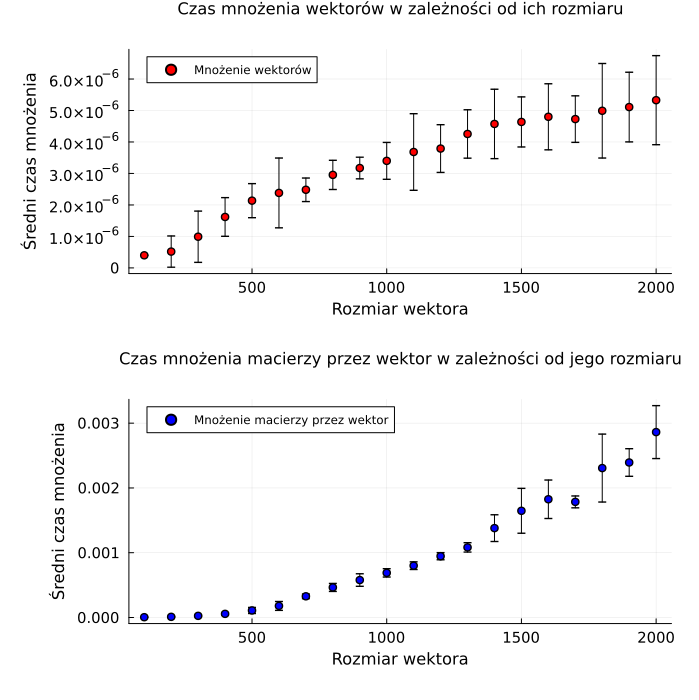

In [36]:
scatter(df2.Size, size = (700, 700), margin=5mm,xtickfontsize=10, ytickfontsize=10, titlefontsize = 11,xlabel = "Rozmiar wektora",ylabel = "Średni czas mnożenia",[df2.mean_scalar,df2.mean_matrix], title = ["Czas mnożenia wektorów w zależności od ich rozmiaru" "Czas mnożenia macierzy przez wektor w zależności od jego rozmiaru"], legend_position = :topleft, label = ["Mnożenie wektorów" "Mnożenie macierzy przez wektor"], color = [:red :blue],yerr = [df2.sd_scalar df2.sd_matrix], layout = grid(2,1,heights=[0.5,0.5]))